In [2]:
import Librerias.Interpolacion1 as In
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
import Librerias.EcuacionesDiferenciabes as Ed
import Librerias.Integral as Int 
import Librerias.Raiz as rr
%load_ext autoreload
%autoreload 2

# Ejercicico 1

Considere los siguientes puntos:

C = (2,2), (3,6), (4,5), (5,5), (6,6)

In [83]:
x = [2,3,4,5,6]
y = [2,6,5,5,6]
x2, y2 = In.poli_cardinal(x,y)
X = sp.Symbol('x')

def función_L(xv,yv,x, n = 5):
    p = 0
    for k in range(n):
        p = p + yv[k] * In.lagrenge(x,xv,k)
    return p
    
x3 = np.linspace(2,6,100)
y3 = sp.lambdify(X,función_L(x,y,X),'numpy')
print(y3)

<function _lambdifygenerated at 0x7f48950d5550>


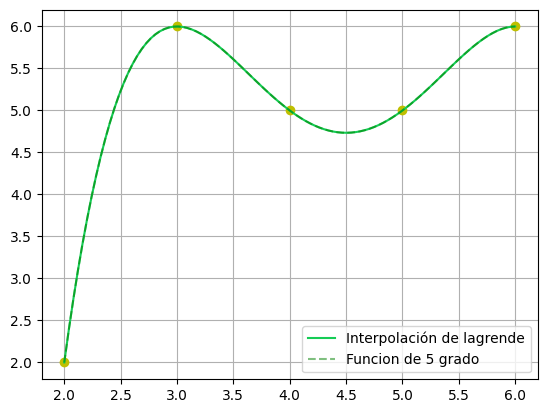

In [85]:
fig, ax = plt.subplots()

ax.plot(x, y, 'yo')
ax.plot(x2, y2, color="#15cc55", marker='', label = 'Interpolación de lagrende')        
ax.plot(x3, y3(x3), 'g--', label = 'Funcion de 5 grado ',alpha = 0.5)        
ax.legend(loc = 4)
ax.grid()


# 2do ejercicio

escriba la serie de Taylor hasta orden $h^{4}$ es decir:

Comenzamos con la serie de Taylor
 $y(x_{i+1}) = y(x_{i}) + hy^{'}(x_{i}) + \dfrac{h^{2}}{2}y^{''}(x_{i}) + \dfrac{h^{3}}{6}y^{'''}(x_{i}) + O(h^{4})$

Hacemos cambio de variable de tal forma que no quede:

$z_{0} = y$,  $z_{0}^{'} = z_{1}$,  $z_{1} = y^{'}$,  $z_{1}^{'} = z_{2}$,  $z_{2} = y^{''}$,  $z_{2}^{'} = y^{'''}$

$z_{0}(x_{i+1}) = z_{0}(x_{i}) + hz_{1}(x_{i}) + \dfrac{h^{2}}{2}z_{2}(x_{i}) + \dfrac{h^{3}}{6}z_{2}^{'}(x_{i})$

$z_{2}^{'} = -\dfrac{6}{h^{3}}(-z_{0}(x_{i+1}) + z_{0}(x_{i}) + hz_{1}(x_{i}) + \dfrac{h^{2}}{2}z_{2}(x_{i}))$

Con esto, tenemos la forma de encontrar nuestra función de taylor, Para el inciso b) decimos que nuestra aproxmación es:

$y_{i+1} = y_{i} + c_{0}hf(x_{i},y_{i}) + c_{1}hf[x_{i} + c_{2}h, y_{i} + c_{2}hf(x_{i},y_{i})]$


# 3er ejercicio

Tenemos las ecuaciones:
$\dfrac{d^{2}x}{dt^{2}} = -k \dfrac{dx}{dt}\sqrt{(\dfrac{dx}{dt})^{2} + (\dfrac{dy}{dt})^{2}}$ y $\dfrac{d^{2}y}{dt^{2}} = -g -k \dfrac{dy}{dt}\sqrt{(\dfrac{dx}{dt})^{2} + (\dfrac{dy}{dt})^{2}}$

Con esto lo que hacemos es crear un nuestras variables nuevas:

Para x: 
$z_{0} = x$ y $z_{1} = x^{'}$ y $z_{1}^{'} = x^{''}$ y $z_{0}^{'} = z_{1}$

Para y: $u_{0} = y$ y $u_{1} = y^{'}$ y $u_{1}^{'} = y^{''}$ y $u_{0}^{'} = z_{1}$

Con esto tenemos nuestras nuevas funciones tales que:

$z_{1}^{'} = -kz_{1}\sqrt{z_{1}^{2} + u_{1}^{2}}$ y $u_{1}^{'} = -g-ku_{1}\sqrt{z_{1}^{2} + u_{1}^{2}}$

In [7]:
def fs(x,y0,dato):
    k,g = dato
    z0,z1,u0,u1 = y0

    z0p = z1
    u0p = u1
    z1p= -k*z1*np.sqrt(z1**2 + u1**2)
    u1p = -g - k*u1*np.sqrt(z1**2 + u1**2)
    return [z0p,z1p,u0p,u1p]

In [53]:
k = 1
g = 9.81
x, dx = 1, 2
y, dy = 5, 7.808
t = [0,2.5]
datos = [k,g]
y0 = [x,dx,y,dy]
x1,y1 = Ed.rk4f2orden(fs,t,y0,arg = datos)
# t = np.linspace(0,2.5,50)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


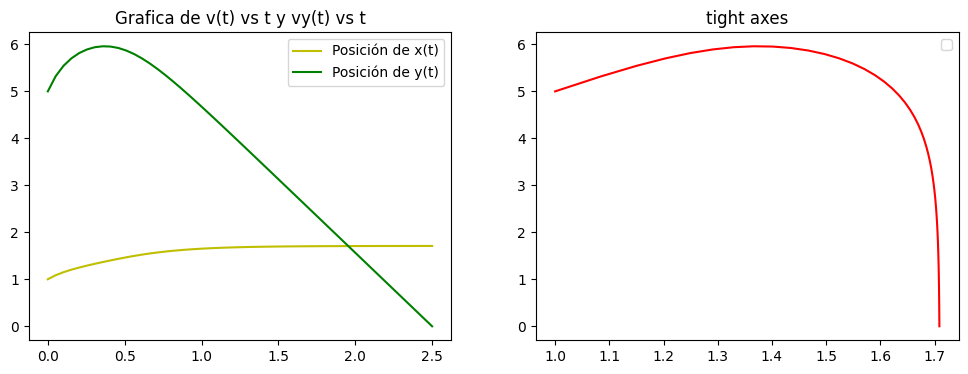

In [25]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4)) 
                     
axes[0].plot(t, y1[:,0], 'y-', label= 'Posición de x(t)')
axes[0].plot(x1, y1[:,2], 'g-', label = 'Posición de y(t)')
axes[0].set_title("Grafica de v(t) vs t y vy(t) vs t")
axes[0].legend(loc=1)

axes[1].plot(y1[:,0],y1[:,2], 'r-' )
axes[1].axis('tight')
axes[1].set_title("tight axes")
axes[1].legend(loc=1)


# Ejercicio 4

Tenemos la ecuación:

$E\psi(x) = \dfrac{\hbar^{2}}{2m} \dfrac{d^{2}\psi(x)}{dx^{2}}$

Con las siguientes condiciones:

$L = 2a$ con $a = 0.5$, $\dfrac{\hbar^{2}}{m} = 1$

Transformandola en una función de orden 1

$z_{0} = \psi(x)$, $z_{1} = \psi^{'}(x)$, $z_{1}^{'} = \psi^{''}(x)$, $z^{'}_{0} = z_{1}$

Con esto lo sustituimos en la función para obtener:

$z^{'}_{1} = \dfrac{2m}{\hbar^{2}}Ez_{0}$

Para nuestra energia cuantizada en $n = 1$ hasta $n = 4$ tenemos:

$E_{1} = \dfrac{\hbar^{2}\pi^{2}}{8ma^{2}}n^{2} = \dfrac{1}{2}\pi^{2}$

$E_{2} = \dfrac{\hbar^{2}\pi^{2}}{8ma^{2}}n^{2} = 2\pi^{2}$

$E_{3} = \dfrac{\hbar^{2}\pi^{2}}{8ma^{2}}n^{2} = \dfrac{9}{2}\pi^{2}$

$E_{4} = \dfrac{\hbar^{2}\pi^{2}}{8ma^{2}}n^{2} = 8\pi^{2}$

In [76]:
def f(x,y0,datos):
    E = datos
    z0,z1 = y0

    hm = 1
    z0p = z1
    z1p = 2*hm*E*z0
    return [z0p,z1p]

In [59]:
y0 = 0
yf= 0.5
x0 = -0.5
xf = 0.5
nptos = 50
hm = 1
E = 8*(np.pi**2)
sig = [hm,E]
# datos = [sig,y0,yf,x0,xf,nptos]
# valdr = Ed.shootingS(f,datos)

[[-2.00000331  0.          0.         ...  0.          0.
   1.        ]
 [ 1.         -2.00000332  1.         ...  0.          0.
   0.        ]
 [ 0.          1.         -2.00000334 ...  0.          0.
   0.        ]
 ...
 [ 0.          0.          0.         ... -2.00000334  1.
   0.        ]
 [ 0.          0.          0.         ...  1.         -2.00000332
   1.        ]
 [ 0.          0.          0.         ...  0.          0.
  -2.00000331]]


/tmp/ipykernel_2217/2143452396.py:16: ComplexWarning: Casting complex values to real discards the imaginary part
  ax[0].plot(xi, y, label=r'$s-Autovalores=%3.2f$'%sEngF2[i])
/home/pepe/miniconda3/lib/python3.9/site-packages/numpy/ma/core.py:3387: ComplexWarning: Casting complex values to real discards the imaginary part
  _data[indx] = dval


(0.0, 1.0)

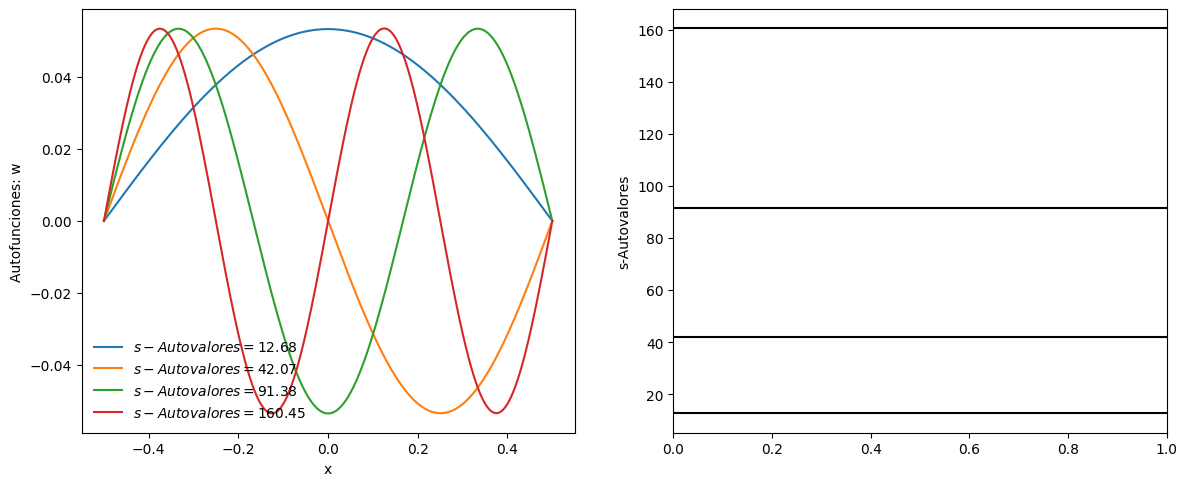

In [3]:
from scipy.linalg import eig

data = [-0.5,0.5,701]
A, xi, h = Ed.matriz2(data, info=False, q=1.5)
print(A)
lEnig1, V1 = eig(A)
sEng = -np.copy(lEnig1)/h**2  # Lambda = -h^2 s
 
ii = np.argsort(sEng)   
sEngF2 = sEng[ii] 
VF1 = V1[:, ii]  

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 5.5))
for i in range(4):
    y = VF1[:, i]
    ax[0].plot(xi, y, label=r'$s-Autovalores=%3.2f$'%sEngF2[i])

  
ax[0].legend(frameon=False)
ax[0].set_ylabel('Autofunciones: w')
ax[0].set_xlabel('x')

for i in range(4):
    ax[1].hlines(y=sEngF2[i], xmin=0, xmax=1, color='k')

ax[1].set_ylabel(r's-Autovalores')
ax[1].set_xlim(0, 1)
